# Tests for VEM algorithm 

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import tqdm
import math
from scipy.special import softmax,expit
import torch
from torch.autograd import Variable

In [3]:
torch.__version__

'1.10.1'

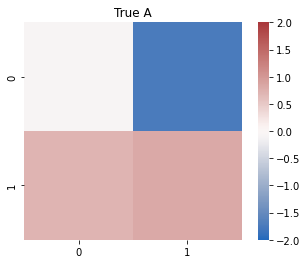

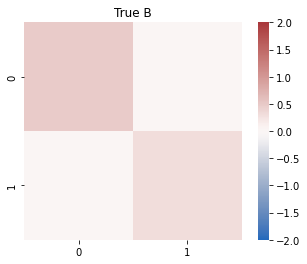

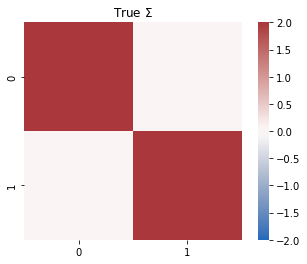

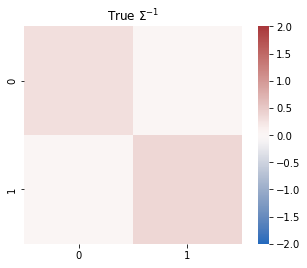

In [4]:
# autoreload sets up auto reloading of modified .py modules
import autoreload
%load_ext autoreload
%autoreload 2
from utils import *
from binary_ts import *

d = 2
T = 3
N = 1

true_A = np.identity(d) + np.random.randn(d,d)
true_B = np.diag(np.random.uniform(low=-0.8,high=0.8,size=d)) 

#small_noise = 1/2*np.random.randn(1)
true_sigma = np.diag(np.random.uniform(low=1,high=4,size=d)) 

sns.heatmap(true_A,square=True,cmap='vlag',vmin=-2,vmax=2)
plt.title('True A')
plt.show()
sns.heatmap(true_B,square=True,cmap='vlag',vmin=-2,vmax=2)
plt.title('True B')
plt.show()
sns.heatmap(true_sigma,square=True,cmap='vlag',vmin=-2,vmax=2)
plt.title('True $\Sigma$')
plt.show()
sns.heatmap(np.linalg.inv(true_sigma),square=True,cmap='vlag',vmin=-2,vmax=2)
plt.title('True $\Sigma^{-1}$')
plt.show()

bints = BinaryTS(d=d,T=T,N=N,true_A = true_A,true_B=true_B,true_sigma = true_sigma,R=100)

In [ ]:
bints.block_cavi(latent_lrs=[1e-3,1e-3,1e-3],mu_lr=1e-4,var_lr=1e-4,max_iter=5000,its=200,batchsize=1)

-----------------------------------------
---------------------------------
--------------------------
-------------------


Block-CAVI initialization...


--------Dimensions of the model--------
T:  3
d:  2
N:  1
Batchsize: 1


-------- Optimization parameters --------


Optimizer steps per parameter:  200
Optimizer for A: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
Optimizer for B: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
Optimizer for sigma_inv: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
Optimizer for mu_approx: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)
Optimizer for var_approx: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    we

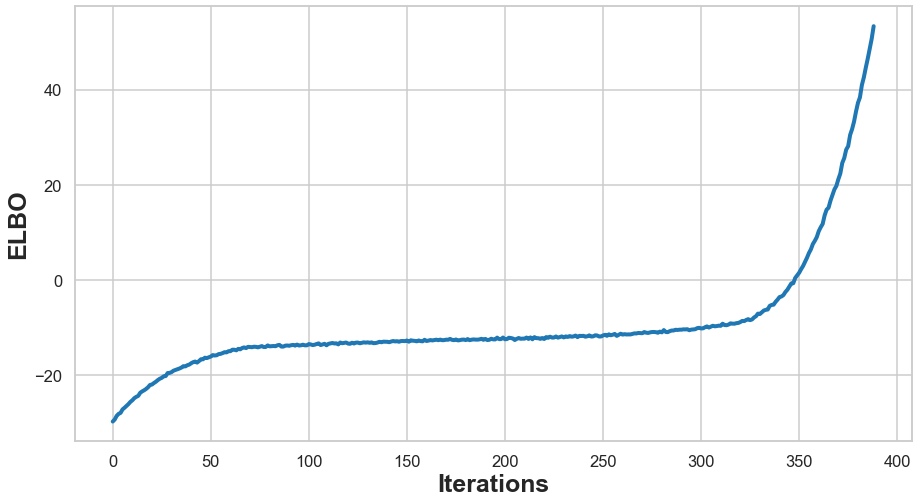

In [77]:
elbo = bints.elbo_track
elbo = elbo.detach().numpy()
sns.set_context('talk')
sns.set_style('whitegrid')

f, ax = plt.subplots(figsize=(15, 8))

ax.set_ylabel('ELBO', fontsize=25, fontweight='bold')

ax.set_xlabel('Iterations', fontsize=25, fontweight='bold')
ax.plot(elbo[1:], linewidth=4)

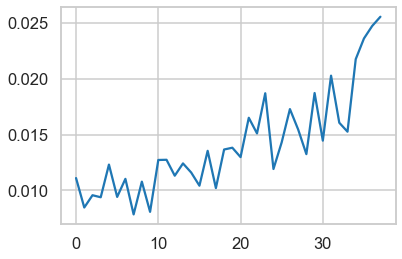

In [78]:
plt.plot(bints.grad_variance)

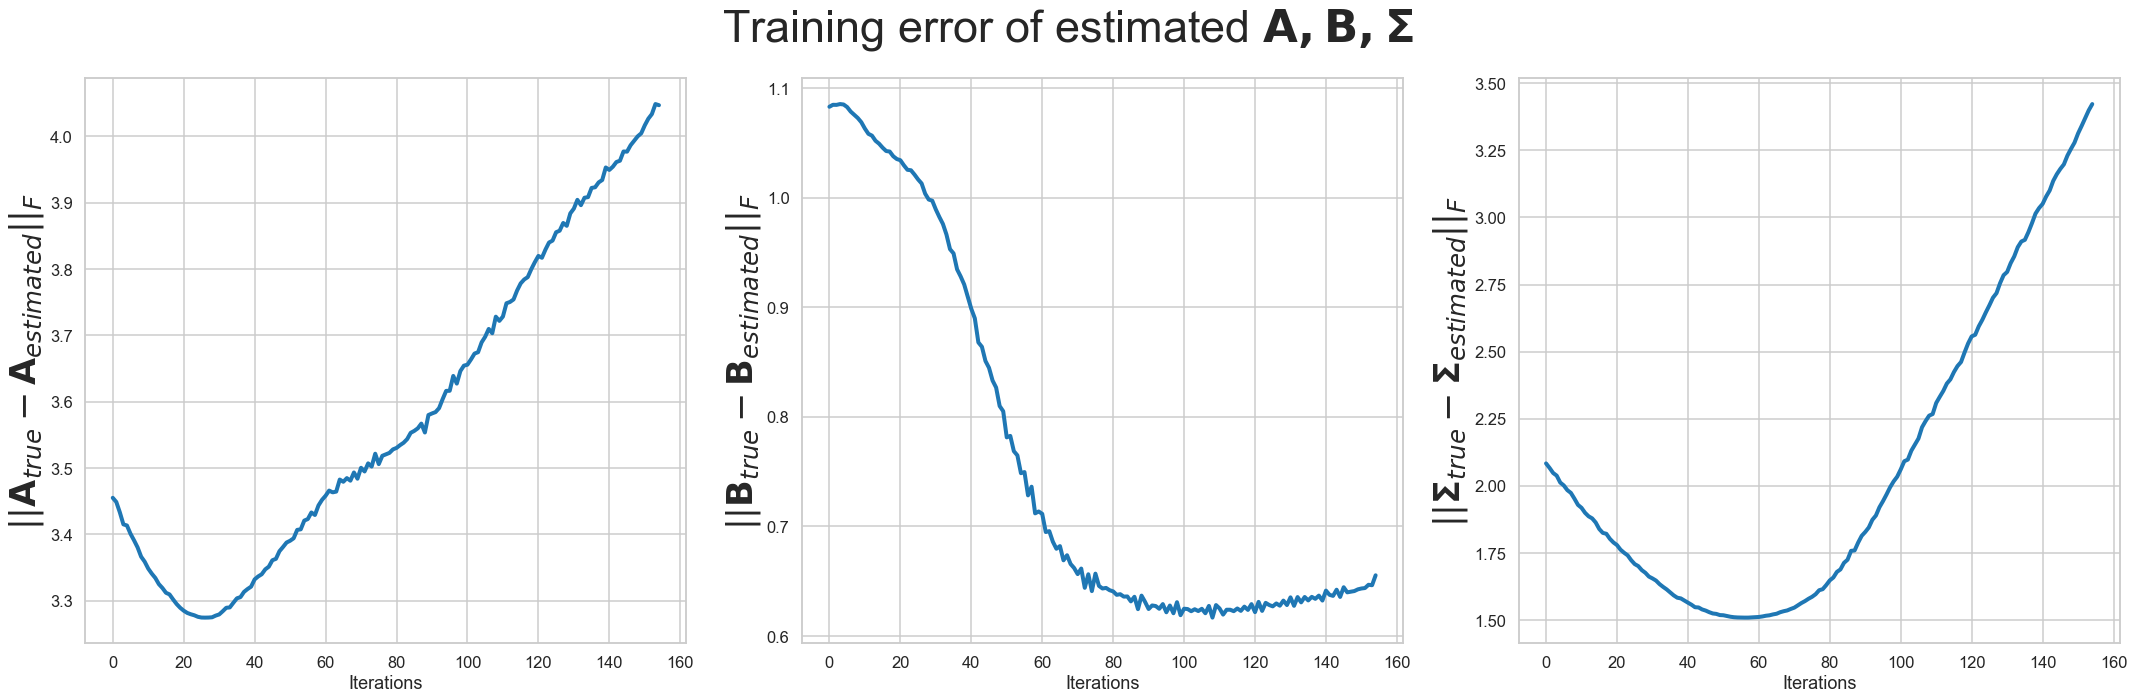

In [63]:
f,ax = plt.subplots(1,3,figsize=(30,10))


f.suptitle('Training error of estimated $\mathbf{A,B,\Sigma}$', fontsize=45)

ax[0].plot(bints.A_error_track[1:],linewidth=4)
ax[0].set_ylabel('$||\mathbf{A}_{true}-\mathbf{A}_{estimated}||_F$',fontsize=35)
ax[1].plot(bints.B_error_track[1:],linewidth=4)
ax[1].set_ylabel('$||\mathbf{B}_{true}-\mathbf{B}_{estimated}||_F$',fontsize=35)
ax[2].plot(bints.sigma_inv_error_track[1:],linewidth=4)
ax[2].set_ylabel('$||\mathbf{\Sigma}_{true}-\mathbf{\Sigma}_{estimated}||_F$',fontsize=35)

for i in [0,1,2]: 
    
    
    ax[i].set_xlabel('Iterations')
plt.tight_layout()

In [44]:
values =bints.log_expectation()

In [59]:
N=1000
values=[]
for i in np.arange(N): 
    values.append(bints.log_expectation().detach().numpy().sum())
    

0.00014319792

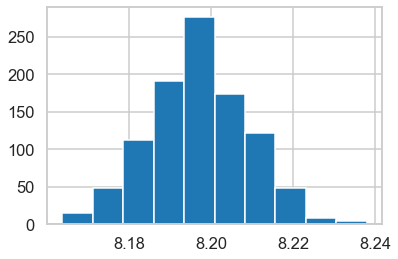

In [62]:
plt.hist(values)
np.var(values)